<a href="https://colab.research.google.com/github/Javier9898/World_Happiness_Report/blob/master/World_Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **World Happiness Report**


---



## **Introduction**
The dataset chosen for this analysis is "World Happiness Report", which is a landmark survey of the state of global happiness that ranks countries by how happy their citizens perceive themselves to be. It contains articles, and rankings of national happiness based on respondent ratings of their own lives,which the report also correlates with various life factors.

There are some interesting alternative approaches to measure a country's happiness as it comes in many different forms and for different reasons and it can be a measure of social progress, according to the authors of the 2013 World Happiness Report. It'll be fascinating to see any correlations between hapiness and regions in the world and what factors contribute to this.


Credits: https://www.kaggle.com/unsdsn/world-happiness

## **Sources**


* Dataset: https://www.kaggle.com/unsdsn/world-happiness
* Official World Happiness Report site: https://worldhappiness.report/

## **Objectives:**
Find the answer to the following questions:

1.  What are the correlations between the data? 
2.  Which factors have the biggest and least impact on happiness?
3. Which countries are the most and least happiest? 
4. How content are we? 

## **Terms Used in the Dataset**

* Overall rank: Rank of the country based on the Happiness Score.
* Country or region: Name of the country or region.
* Score:	A metric measured by asking the sampled people the question: "How would you rate your happiness on a scale from 1 to 10?".
* GDP per capita:	The extent to which GDP contributes to the calculation of the Happiness Score.
* Social support:	network of family and friends.
* Freedom to make life choices: The extent to which Freedom contributed to the calculation of the Happiness Score.
* Healthy life expectancy: The extent to which Life expectancy contributed to the calculation of the Happiness Score.
* Generosity:	The extent to which Generosity contributed to the calculation of the Happiness Score.
* Perceptions of corruption: Perceived levels of public sector corruption.



### **Data file:**



*   2019.csv


---






In [ ]:
import numpy as np #  multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions
import pandas as pd # data manipulation
from functools import reduce

# data visualization libraries
import matplotlib.pyplot as plt  
import seaborn as sns 
import plotly.graph_objs as go
from plotly.offline import iplot

from zipfile import ZipFile # used in this project to unzip the data

## **1. Reading and Storing Data**

### **Data Pre-processing**

In [ ]:

# Unzipping the data
file_name = "894_813759_bundle_archive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  
  print("Done")

Done


In [ ]:
# Storing the data in a Dataframe
# Using the latest report "2019"
data2019 = pd.read_csv("2019.csv")

print("Done")

Done


In [ ]:
data2019.sample(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
29,30,Spain,6.354,1.286,1.484,1.062,0.362,0.153,0.079
98,99,Ivory Coast,4.944,0.569,0.808,0.232,0.352,0.154,0.090
130,131,Myanmar,4.360,0.710,1.181,0.555,0.525,0.566,0.172


### **Checking for NaN**

In [ ]:
print("Number of NaN values:")
data2019.isnull().sum()

Number of NaN values:


Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

### **Removing Duplicates**

In [ ]:
duplicates = data2019.duplicated(["Overall rank","Country or region"])
print("Number of duplicate rows = "+str(duplicates.sum()))

Number of duplicate rows = 0


### **Basic Statistics**

In [ ]:
data2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


### **Correlations Between the Data**

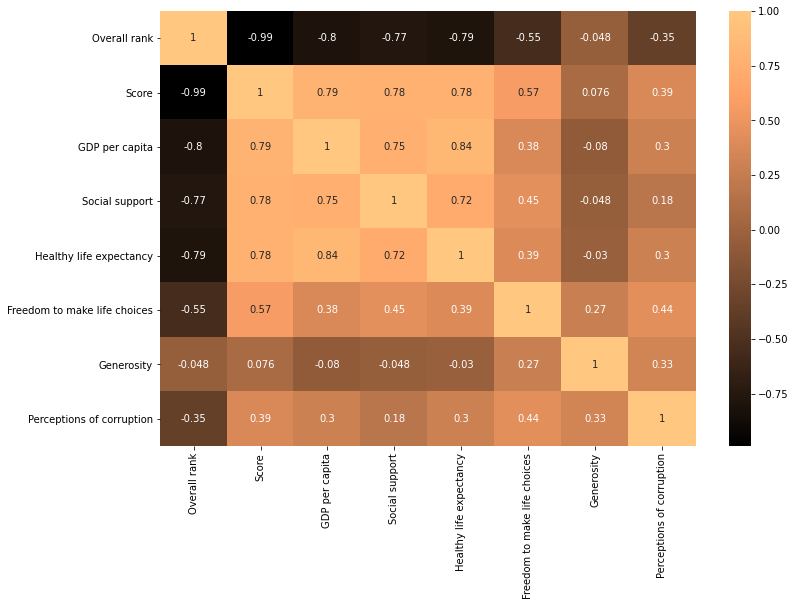

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(data2019.corr(), cmap = 'copper', annot = True)

plt.show()

From the above Heat Map we can observe the Happiness Score from 2019 being highly correlated with **economy**, **social support**, **health** and somewhat related to **Freedom**. It can also be seen how it has a very low relation on average with trust in government and generosity which produced the lowest impact on happiess.

### **Correlation Columns for the Happiness Score**

<Figure size 864x576 with 0 Axes>

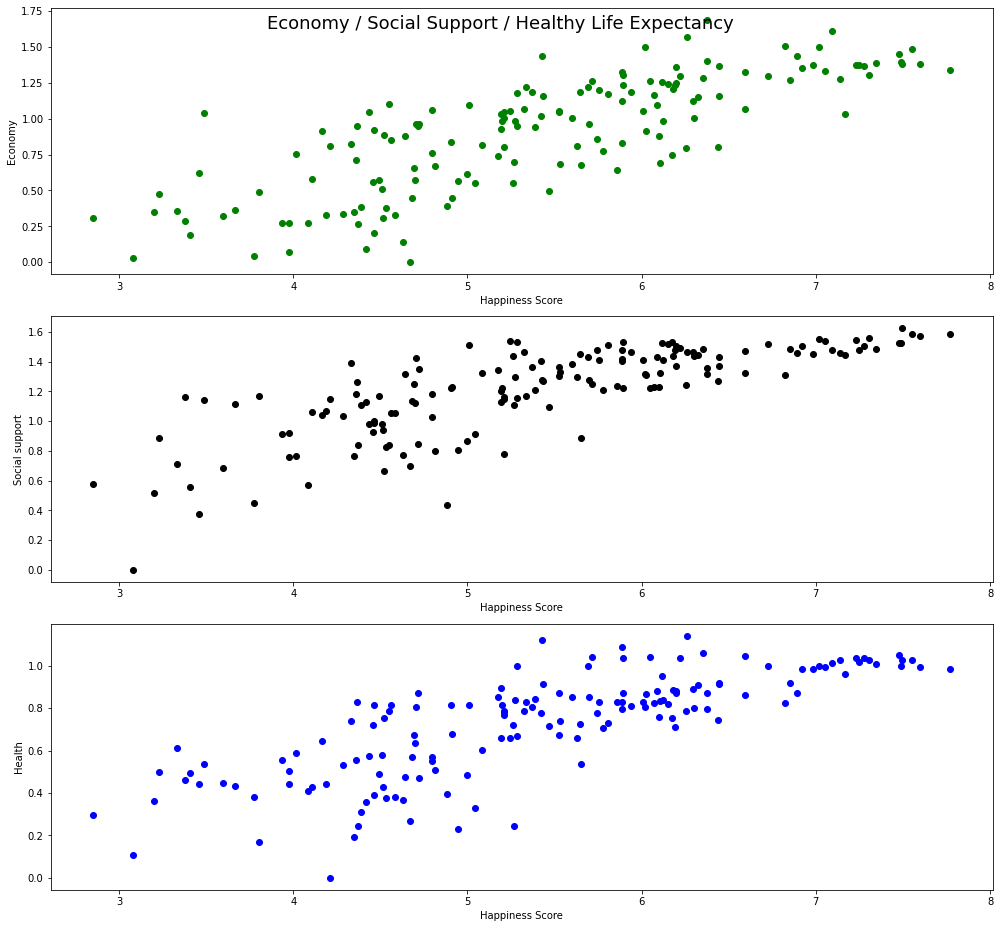

In [ ]:
plt.clf()

plt.figure(figsize=(14,13));

plt.subplot(3,1,1);      # 1st row 
plt.scatter(data2019['Score'], data2019['GDP per capita'], color='g');
plt.xlabel("Happiness Score");
plt.ylabel("Economy");

plt.subplot(3,1,2);     # 2nd row
plt.scatter(data2019['Score'], data2019['Social support'], color='black');
plt.xlabel("Happiness Score");
plt.ylabel("Social support");

plt.subplot(3,1,3);     # 3rd row
plt.scatter(data2019['Score'], data2019['Healthy life expectancy'], color='b');
plt.xlabel("Happiness Score");
plt.ylabel("Health");


plt.suptitle("Economy / Social Support / Healthy Life Expectancy",fontsize=18)
plt.tight_layout()
plt.show()

From the graphs above it can be observed that as more Economy, Social Support and a Healthy Life Expectancy a country possess the happier its people are.

### **Geographic Visualization of Happiness Score**

In [ ]:
data = dict(type = 'choropleth', 
           locations = data2019['Country or region'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = data2019['Score'], 
           text = data2019['Country or region'],
           colorbar = {'title':'Happiness'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

From the above world map we can observe how Europe, Oceania and the American continent are the top 3 happiest continents in the world, leaving Asia and Africa as the unhappiest. Its also interesting to notice how northern countries seem to be very happy.



### **Top 10 Happiest Countries of 2019**

In [ ]:
data2019[['Country or region', 'Score']].sort_values(by = 'Score', ascending = False).head(10)

,Country or region,Score
0,Finland,7.769
1,Denmark,7.600
2,Norway,7.554
3,Iceland,7.494
4,Netherlands,7.488
5,Switzerland,7.480
6,Sweden,7.343
7,New Zealand,7.307
8,Canada,7.278
9,Austria,7.246


These countries continue to pioneer in social and economic welfare, education and best practices for work which is something of which other countries should take as an example to follow when looking at improving the happiness of their people.

### **Top 10 Unhappiest Countries of 2019**

In [ ]:
data2019[['Country or region', 'Score']].sort_values(by = 'Score', ascending = True).head(10)

,Country or region,Score
155,South Sudan,2.853
154,Central African Republic,3.083
153,Afghanistan,3.203
152,Tanzania,3.231
151,Rwanda,3.334
150,Yemen,3.380
149,Malawi,3.410
148,Syria,3.462
147,Botswana,3.488
146,Haiti,3.597


These countries could most definitely lack a good social support, health care system and leadership for their population which deprives them from the comfort of living in a place where all conceivable basic needs are met.

### **Happiness Score Levels Pie Chart**

In [ ]:
# Creating a Dataframe with High, Normal and Low categories for the Happiness score of each country.
data_mean = pd.DataFrame()

score_mean = sum(data2019.Score)/len(data2019.Score)
std_score = data2019.Score.std()

data_mean["Score"] = data2019.Score
data_mean["Score_Level"]=["High" if i>(scoremean+stdscore) 
                         else "Normal" if (scoremean-stdscore)<i<(scoremean+stdscore) 
                         else "Low" for i in data2019.Score]

Text(0.5, 1.0, 'Score Level of 2019 Pie Chart')

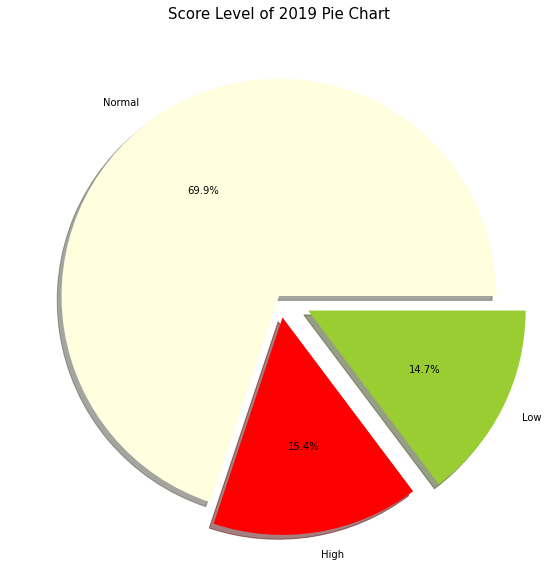

In [ ]:
labels=data_mean.Score_Level.value_counts().index
colors=("lightyellow","red","yellowgreen")
explode=[0,0.1,0.15]
sizes=data_mean.Score_Level.value_counts().values

plt.figure(figsize=(10,10))
plt.pie(sizes,explode=explode,colors=colors,labels=labels,shadow=True,autopct='%1.1f%%')
plt.title("Score Level of 2019 Pie Chart",color="Black",fontsize=15)

About 84.6% of the Population is content with the way they live in their country

## **Conclusion**
Its not easy to define what the word happy means and it can be a difficult task to quantify it. This data may be biased and it probably is but the analysis done on it shows some intresting facts on what factors can't be ignored for the happiness of a country, such as Economy, Social Support and Health, to be present. 

It is challenging to think of the future and how it'll look like. Due to the world pandemic we currently live in as of 2020, all the important factors that seem to contribute to content are being negatively affected by the virus.